In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sqlite3
import seaborn as sns
import numpy.polynomial.polynomial as poly

In [2]:
SDB = sqlite3.connect(r'C:\Users\pauli\Desktop\DataScienceNotebooks\DATA\WEBscr.db')
Cs = SDB.cursor()
sql="""SELECT * FROM TUrl;"""
Cs.execute(sql)
ans = Cs.fetchall()
df1 = pd.read_sql_query(sql, con=SDB)
df1.head(3)

,id,url,name,params
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...


In [3]:
df1['kaina']= df1['params'].apply(lambda x: str(x.split(';')[-1]))
df1['kaina']= df1['kaina'].apply(lambda x: str(x.split('€')[0]).replace(' ','').replace('€',''))
df1['kaina']= df1['kaina'].apply(lambda x: float(x))

In [4]:
df1['metai']=df1['params'].apply(lambda x: str(x.split(';')[1]))
df1['metai']=df1['metai'].apply(lambda x: int(x.split('-')[0]))

In [5]:
df1['rida']=df1['params'].apply(lambda x: str(x.split(';')[-3]))

In [6]:
df1.head()

,id,url,name,params,kaina,metai,rida
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,1750.0,2008,Mechaninė
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,3900.0,2011,10 km
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,6800.0,2020,14 000 km
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,60500.0,2024,66kW
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,18900.0,2017,75 000 km


In [7]:
SDB = sqlite3.connect(r'C:\Users\pauli\Desktop\DataScienceNotebooks\DATA\WEBscr.db')
Cs = SDB.cursor()
sql="""SELECT * FROM TAutos;"""
Cs.execute(sql)
ans = Cs.fetchall()
df2 = pd.read_sql_query(sql, con=SDB)
df2.head(3)

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,Pirmosios registracijos šalis,Kėbulo numeris (VIN),Euro standartas,"CO₂ emisija, g/km",Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,None,None,None,None,None,None,None,None,None,None
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,None,None,None,None,None,None,None,None,None,None
2,26631227,-Kita-,2020-02,Elektra,Hečbekas,2/3,None,Skelbimo ID: A26631227,"-Kita- -kita-, hečbekas",14 000 km,...,None,None,None,None,None,None,None,None,None,None


In [8]:
df1=df1[['id','kaina']]
df= pd.merge(df2, df1, on='id', how='inner')

In [9]:
df=df[['gamintojas', 'Pirma registracija', 'Pavarų dėžė', 'Rida', 'Defektai', 'kaina', 'Kėbulo tipas' ]]

In [10]:
df = df[df['Pirma registracija'].notna()]
df = df[df['Pavarų dėžė'].notna()]
df = df[df['Rida'].notna()]
df = df[df['Kėbulo tipas'].notna()]
df = df[df['Defektai'].isna()]
df= df[df['kaina'] <100000]

df=df[['gamintojas', 'Pirma registracija', 'Pavarų dėžė', 'Rida', 'kaina', 'Kėbulo tipas' ]]

In [11]:
df['Pirma registracija']= df['Pirma registracija'].apply(lambda x: float(str(x).split('-')[0]))
# df.loc[:, 'Pirma registracija'] = df['Pirma registracija'].apply(lambda x: int(str(x).split('-')[0]).strip())
df= df[df['Pirma registracija'] > 1990]

In [12]:
df['Rida']= df['Rida'].apply(lambda x: float(str(x).replace(' ','').replace('km','')))
df= df[df['Rida'] <500000]

In [13]:
dftop = df.groupby('gamintojas').count()
dftop = dftop.sort_values(by='kaina', ascending=False)
dftop = dftop.head(7)
top7 = dftop.index.to_list()

print(top7)

['Audi', 'BMW', 'Mercedes-Benz', 'Volkswagen', 'Toyota', 'Ford', 'Opel']


In [14]:
df1=df[df['gamintojas']==top7[4]]

In [15]:
pavaros=df1['Pavarų dėžė'].unique()
print(pavaros)

['Automatinė' 'Mechaninė']


In [16]:
df1=df1[df1['Pavarų dėžė']==pavaros[0]]

In [17]:
metai = 2012
df1 = df1[(df1['Pirma registracija'] >= metai - 1) & (df1['Pirma registracija'] <= metai + 1)]

In [18]:
kebulas=df1['Kėbulo tipas'].unique()
print(kebulas)

['Universalas' 'Hečbekas' 'Vienatūris' 'Visureigis / Krosoveris' 'Sedanas'
 'Kupė (Coupe)' 'Kita']


In [19]:
df1=df1[df1['Kėbulo tipas']==kebulas[0]]

[ 1.83643092e-12 -1.17348759e-06  2.20876341e-01 -3.43864986e+03]


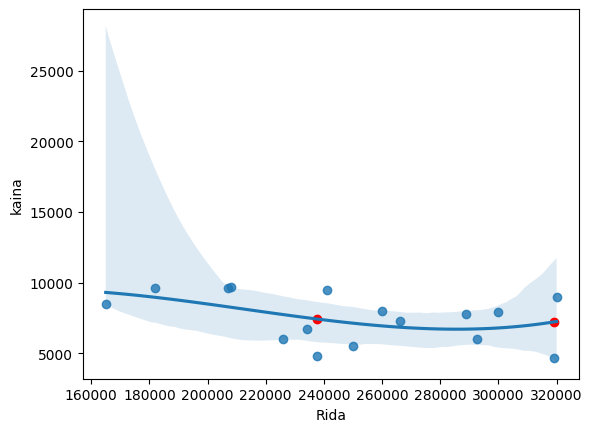

In [20]:
coef = np.polyfit(x=df1['Rida'], y=df1['kaina'], deg=3)
print(coef)
fn_fit = poly.Polynomial(coef[::-1])
kainos_fitted = fn_fit(df1['Rida'])
df1['K_fit'] = kainos_fitted

ax = sns.regplot(data=df1, x='Rida', y='kaina', order=3)
ax.scatter(x=df1['Rida'][::10], y=df1['K_fit'][::10], c='red')

plt.show()

In [21]:
fn_fit(300000)

np.float64(6794.004180161039)

In [22]:
coefs = np.polyfit(x=df1['Rida'], y=np.log(df1['kaina']), deg=1)
#!coefs are in decreasing order!↪
B,A = coefs
yfit = np.exp(A)*np.exp(B*300000)+1

print(yfit)

6629.001326349198


In [23]:
df1.head(500)

,gamintojas,Pirma registracija,Pavarų dėžė,Rida,kaina,Kėbulo tipas,K_fit
29560,Toyota,2011.0,Automatinė,319000.0,4650.0,Universalas,7219.410212
29900,Toyota,2011.0,Automatinė,250000.0,5490.0,Universalas,7131.694151
29927,Toyota,2012.0,Automatinė,234295.0,6750.0,Universalas,7513.089205
29949,Toyota,2013.0,Automatinė,300000.0,7900.0,Universalas,6794.004180
29961,Toyota,2013.0,Automatinė,165000.0,8500.0,Universalas,9307.224031
29979,Toyota,2013.0,Automatinė,206943.0,9600.0,Universalas,8290.299339
30866,Toyota,2013.0,Automatinė,260000.0,7999.0,Universalas,6938.547575
30897,Toyota,2013.0,Automatinė,320000.0,8950.0,Universalas,7252.818424
30912,Toyota,2013.0,Automatinė,241000.0,9500.0,Universalas,7340.695986
30915,Toyota,2013.0,Automatinė,182000.0,9600.0,Universalas,8961.289966


In [24]:
len(df1)

16

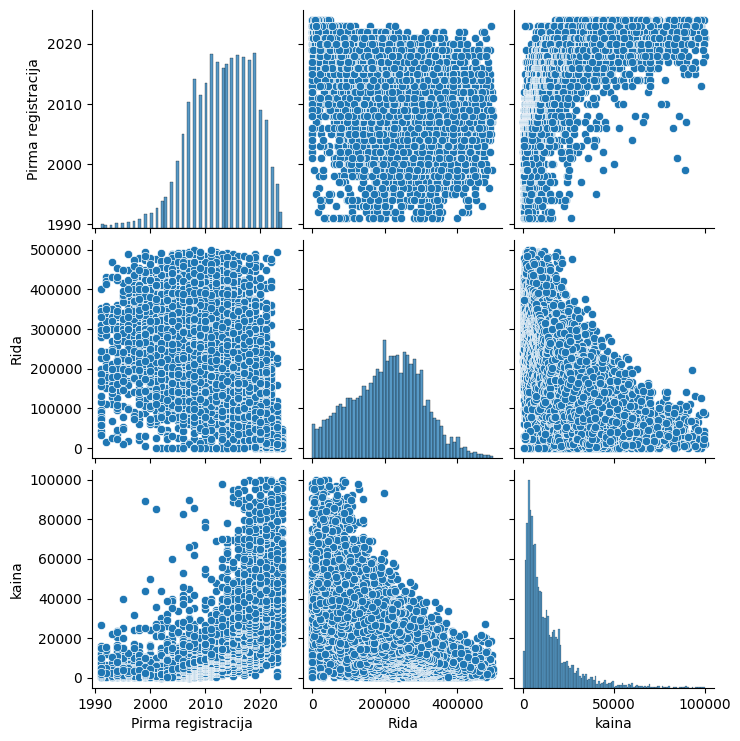

In [25]:
sns.pairplot(data=df)

In [26]:
dd = {'a': None, 'b': 'labas'}
dd['a'] = 65

print(dd['a'])

65


<Axes: >

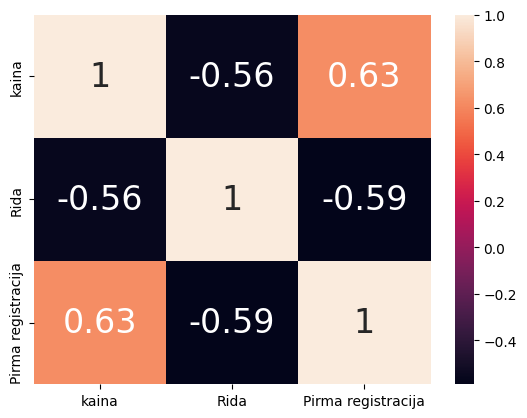

In [27]:
dt=df[['kaina', 'Rida', 'Pirma registracija']].corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':24})